In [2]:
%matplotlib inline

'''
Use %matplotlib inline instead of %matplotlib widget when preparing the final report. 
Otherwise the images are, unfortunately, not embedded in the pdf. 
'''

from importstatements import *
css_styling()

## $
\newcommand{\fsamp}{{F_s}}
\newcommand{\unit}[1]{\mathrm{\,#1}}
\newcommand{\tmidx}{n}
\newcommand{\tds}[2][\tmidx]{{#2(#1)}}
\newcommand{\matcmd}[2][(\cdot)]{\texttt{#2}#1}
\renewcommand{\matcmd}[2][(\cdot)]{\mathrm{#2}#1}
\newcommand{\fcn}[1]{{\text{#1}}}
\newcommand{\bigcb}[1]{{\big\{#1\big\}}} 
\newcommand{\Bigcb}[1]{{\Big\{#1\Big\}}}
\newcommand{\bigsb}[1]{{\big[#1\big]}} 
\newcommand{\Bigsb}[1]{{\Big[#1\Big]}}
\newcommand{\biggsb}[1]{{\bigg[#1\bigg]}}
\newcommand{\pyt}{\matcmd[]{Python}}
$

# Basic concepts of continuous- and discrete-time signal processing

The goal of this exercise is to gain practical insights into fundamental signal processing concepts such as signal _sampling_, aliasing, windowing and the Fourier transform. These methods and concepts are commonly applied in medical signal and image analysis and a good understanding of these basics is essential  required. For more information on these concepts, check the course slides and notes.

## Required modules

During this practical session, the following libraries will be used:

- `numpy`
- `matplotlib`
- `scipy`

To import any external library, you need to import it using the **`import`** statement followed by the name of the library (e.g. `import numpy as np`). These imports have already been done for you in the code segment above. Please refer to the `importstatements.py` file related to _this_ project for examples. Further projects will come with their own `importstatements.py` function, where only the typical packages required for _that_ project will be imported. This will help preserve the modularity of the notebook.

## Exercise: Sampling and the discrete Fourier transform

Consider a sine wave signal with frequency $F=2\unit{Hz}$ and a length of $1\unit{s}$. Sample the signal with a sampling frequency $\fsamp=128\unit{Hz}$.

<div class="alert alert-info">

**Task**  
    
- Generate the sampled signal. Call it $x$.
- Plot the sampled signal (use discrete points '*') against time. Label the x-and y-axes clearly. You can define the time axis with the functions [`arange`][arg]. Please click on the function name to see the corresponding documentation. Please read it _carefully_ to understand the outputs they produce.
- Additional help with plot is available in the documentation of Matplotlib. An link to [`xlabel`][xlabel] is included, you can look up similarly for `ylabel`, `title` etc.
- Similarly, look up documentation for the different plotting styles. [This][pltstyle] may be a quick (unofficial) reference.
</div>

Your answer should look like:

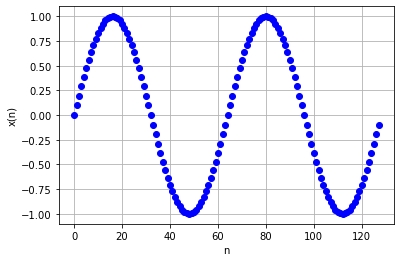

[lsp]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
[arg]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
[xlabel]: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
[pltstyle]: https://www.geeksforgeeks.org/line-plot-styles-in-matplotlib/

<div class="alert alert-success">
<span style="color:black">

**Solution**
- Since the frequency $F$ is known, we are able to calculate the angular velocity:  $\omega = 2\pi F = 4\pi$. The analytical representation of the signal becomes $$t\mapsto x(t) := \sin(\omega t) = \sin(4\pi t), \quad t \in \mathbb{R}.$$ Sampling this signal with sample frequency $F_s = 128$ Hz, the sampled signal $x_s : \mathbb{N} \rightarrow \mathbb{R}$ is defined by
$$n\mapsto x(nT_s)=x_s(n)=x(n), \quad n \in \mathbb{N}.$$

In [3]:
## Parameters ##
fs = 128                              # Sample frequency
F = 2                                 # Signal frequency
T = 1.0                               # Time in seconds
nTs = np.arange(0, T*fs)/fs           # Sample values
x = lambda t: np.sin(2*np.pi*F*t)     # Define the sine signal based on nTs

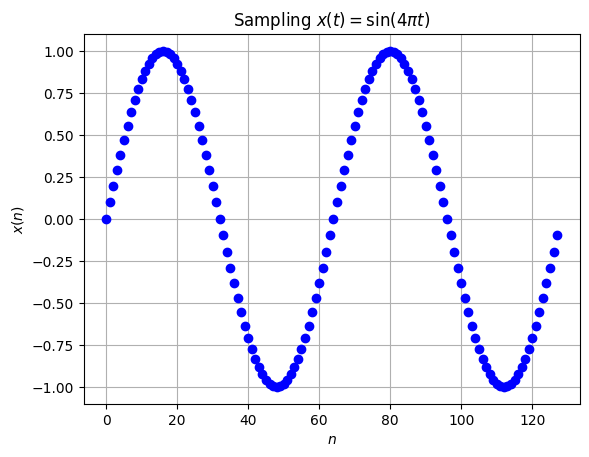

In [4]:
## plotting the signal ##

# making figure
fig = plt.figure(); fig.clf()
axSignal = fig.add_subplot(111)

# plotting signal
axSignal.plot(range(0,x(nTs).size),x(nTs),'bo')

# lay out
plt.title('Sampling $x(t) = \sin(4\pi t)$')
axSignal.set_xlabel('$n$')
axSignal.set_ylabel('$x(n)$')
plt.grid()


plt.show()

Now we shall perform the spectral decomposition of this signal. As we have seen, spectral decomposition is the process by which a signal can be expressed as the sum of sinusoids with different frequencies (spectrum). For discrete-time (sampled) signals, we use the discrete Fourier transform (DFT) for the spectral decomposition. The DFT is optimally implemented using the _fast_ Fourier transform, usually termed the FFT. Note that, for a real-valued signal, the DFT yields a complex valued spectrum containing the _phase_ and the _magnitude_ of each frequency component.

<div class="alert alert-info">

**Task**
    
- Calculate the DFT of `x` using functions [`fft.fft`][fft] and plot the magnitude of the DFT. Use the functions [`np.abs`][abs] and [`fft.fftfreq`][ffreq] for this. 
- Plot the magnitude spectrum with the frequency variable along the x-axis. _Clearly_ label and limit the axes
    
*Hint* You may need the [`fftshift`][fshift] function during plotting to obtain easily interpretable results.
</div>

What your answer should look like:

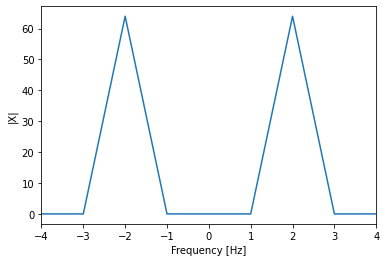

[fft]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html
[ffreq]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html
[fshift]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftshift.html
[abs]: https://numpy.org/doc/stable/reference/generated/numpy.absolute.html

In [5]:
## Discrete Fourier Transform ##
X = fft.fft(x(nTs))
X = fft.fftshift(X)

In [6]:
## corresponding frequencies ##
freq = fft.fftfreq(fs, d = T/fs)
freq = np.fft.fftshift(freq)

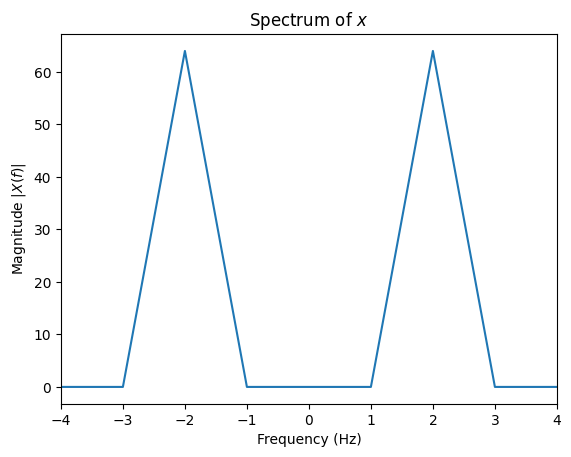

In [7]:
## plotting the spectrum ##

# making figure
fig = plt.figure(); fig.clf()
axMagnitude = fig.add_subplot(111)

axMagnitude.plot(freq, np.abs(X))
axMagnitude.set_xlim(-4, 4)

axMagnitude.set_title('Spectrum of $x$')
axMagnitude.set_xlabel('Frequency (Hz)')
axMagnitude.set_ylabel('Magnitude $|X(f)|$')


plt.show()

<div class="alert alert-info">
    
**Task** 

From the DFT analysis of your signal answer the following
    
- Where do you see the frequency of the generated pure tone? 
- Is this what you expect?

Please answer in the cell below.
</div>

<div class="alert alert-success">
<span style="color:black">

    
* Please ignore the above tags and markup script. 
* Please enter your answer/explanation here. 
* Please do not remove the tags above and below. Use `Markdown` mode for this cell. 
* You may use $\LaTeX$ formatting if you require to insert any mathematical formulae (e.g. $x_1=\sin(2\pi f t)$).

Note that this only applies to the cells where a textual answer/analysis is required.
    
**Solution**
- The spectrum contains two frequencies: $f_{1,2} = \pm 2$
- This is what we expect; our signal can be decomposed as two complex exponentials (basic functions of Fourier Series) with frequencies $2$ and $-2$
$$x(t) = \sin(4\pi t) = \frac{e^{j4\pi t}-e^{-j4\pi t}}{2i}$$ \begin{align*} &\Rightarrow \omega_{1,2} =\pm 4\pi = \pm 2\pi f_{1,2} \\ &\Rightarrow  f_{1,2} = \pm 2. \end{align*} Another way of validation is to remark that the sine function (with $F = 2$ Hz) is real, hence the symmerty of its spectrum (this follows from the fourier properties). 

## Exercise: Sampling and Nyquist Frequency
We shall now investigate the effect of sampling and _aliasing_. For this we shall consider an underlying (continuous-time) signal that consists of the sum of $K=4$ different sinusoids. Each sinusoidal component $k$ is given by the general equation $A_k \sin\big(2 \pi f_k t\big)$. The $A_k$ and $f_k$ are as follows:

- $A_1 = 0.3$, $f_1=10\unit{Hz}$
- $A_2 = 0.4$, $f_2 = 30\unit{Hz}$
- $A_3 = 0.5$, $f_3 = 50\unit{Hz}$
- $A_4 = 0.2$, $f_4 = 80\unit{Hz}$

<div class="alert alert-info">
    
**Task** 

What constraint should the sampling frequency $\fsamp$ satisfy for correctly sampling this signal?
Please answer in the cell below.
</div>

The sampling frequency Fs should be at least twice the greatest frequency of the signal, otherwise aliasing might occur. In this case, the sampling frequency should be at least 160 Hz



Now consider that we observe this analogue signal for a duration of $5\unit{s}$. 

<div class="alert alert-info">
    
**Task** 

Assume the sampling frequency is $\fsamp=200\unit{Hz}$.    

- Plot the sampled signal (use continuous line for the plotting, not discrete points). Label the axes correctly and _clearly_. 
- Compute and plot the amplitude spectrum of this signal using the DFT
- Based on these plots, is the spectrum what you expect to see?     
</div>

What your answer should look like:

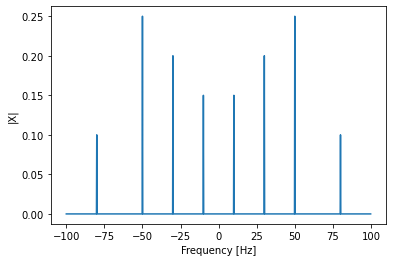

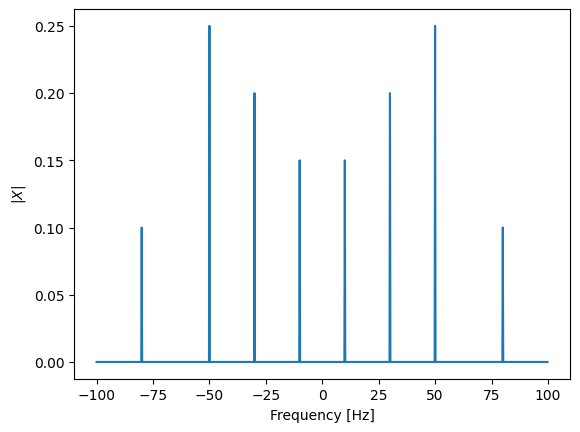

In [8]:
Fs = 200
n = np.arange(0, 5 , 1/Fs)
signal = 0.3*np.sin(2*np.pi*n*10) + 0.4*np.sin(2*np.pi*n*30) + 0.5*np.sin(2*np.pi*n*50) + 0.2*np.sin(2*np.pi*n*80)

DFT = fft.fft(signal)
mag = fft.fftshift(np.abs(DFT)/n.size)
a = mag.size
freq = fft.fftshift(fft.fftfreq(a, d=1/Fs))



plt.plot(freq,mag)
plt.ylabel('$|X|$')
plt.xlabel('Frequency [Hz]')

plt.show()


The signal consists of multiple real sine functions this causes 2 dirac delta's at both + Fk and - Fk in the spectrum. The magnitude of the peaks corresponds to half of the amplitude of the sine functions because the frequencies are evenly split into a positive and negative peak.

<div class="alert alert-info">
    
**Task** 

Now, assume the analogue signal was sampled at a sampling frequency of $\fsamp=100\unit{Hz}$.    

- Plot the sampled signal (use continuous line for the plotting, not discrete points). Label the axes correctly and _clearly_. 
- Compute and plot the amplitude spectrum of this signal using the DFT
- Based on these plots, explain the spectrum you obtain.
- Previously you defined the 3rd sinusiod as $A_3\sin(2\pi F_3t)$. How does the spectrum you obtain change if you design this as $A_3\cos(2\pi F_3t)$? Can you explain the difference?
</div>

What your answer should look like:

<table><tr>
<td> 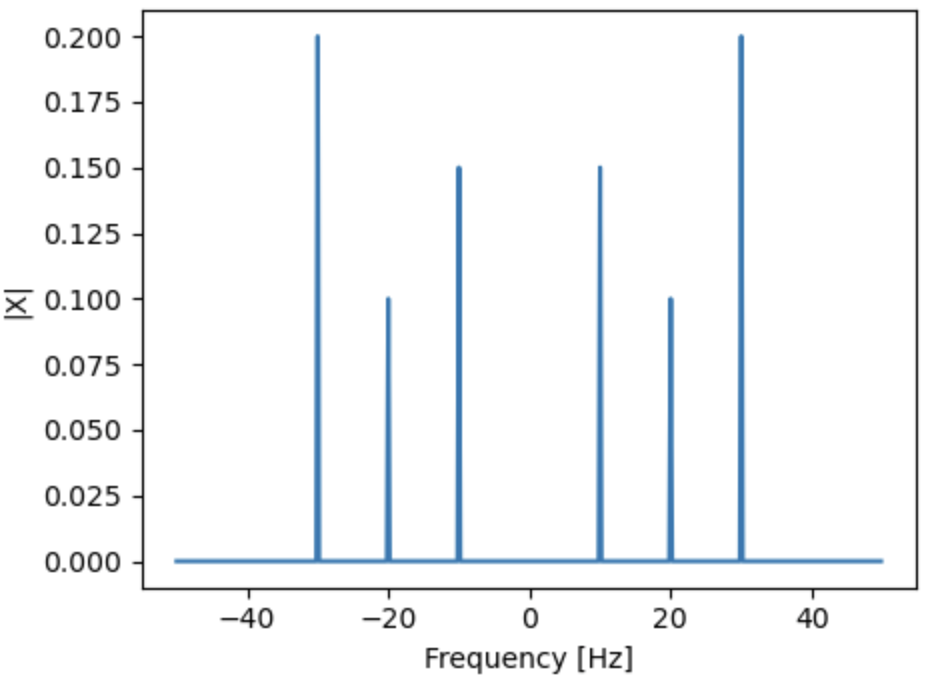 </td>
<td> 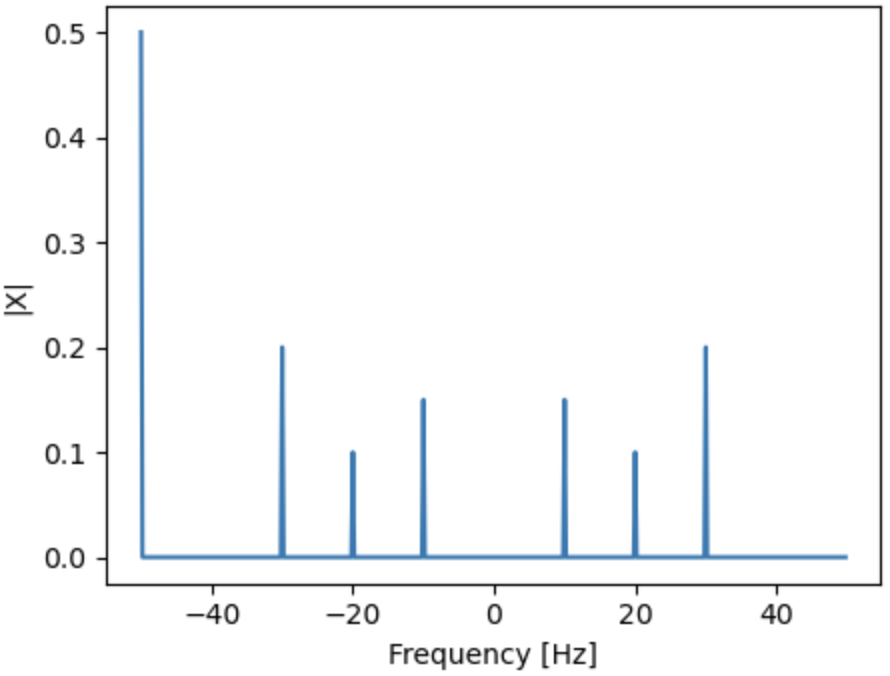 </td>
</tr>
    <td> Using the <b>sine</b> for the 3rd sinusoid </td>
    <td> Using the <b>cosine</b> for the 3rd sinusoid </td>
</table>    


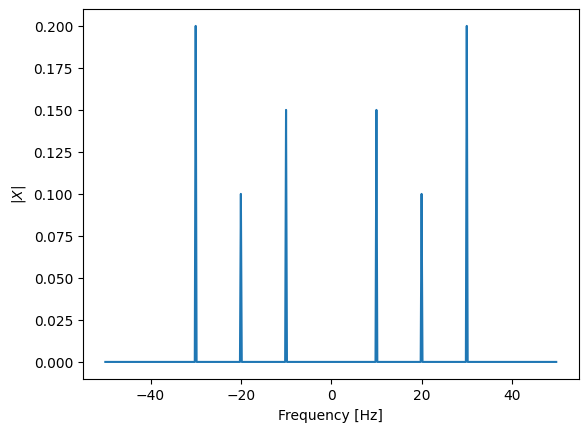

In [9]:
Fs = 100
n = np.arange(0, 5 , 1/Fs)
signal = 0.3*np.sin(2*np.pi*n*10) + 0.4*np.sin(2*np.pi*n*30) + 0.5*np.sin(2*np.pi*n*50) + 0.2*np.sin(2*np.pi*n*80)

DFT = fft.fft(signal)
mag = fft.fftshift(np.abs(DFT)/n.size)
a = mag.size
freq = fft.fftshift(fft.fftfreq(a, d=1/Fs))

plt.plot(freq,mag)
plt.ylabel('$|X|$')
plt.xlabel('Frequency [Hz]')

plt.show()

The sample frequency in this case is lower then 2 times the maximum frequency of the signal. This causes overlapping of alliases. Destructive and constructive interference of the peaks caused by the overlapping takes place.

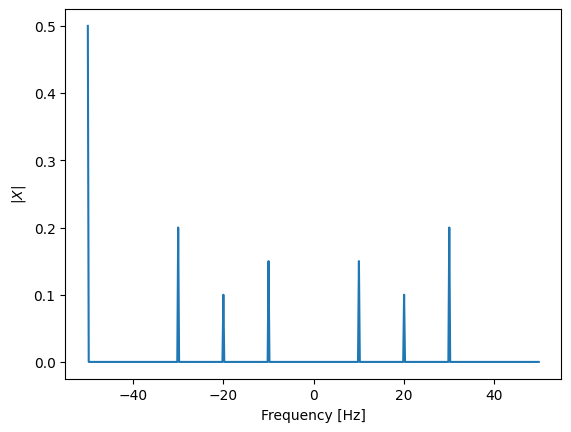

In [10]:
Fs = 100
n = np.arange(0, 5 , 1/Fs)
signal = 0.3*np.sin(2*np.pi*n*10) + 0.4*np.sin(2*np.pi*n*30) + 0.5*np.cos(2*np.pi*n*50) + 0.2*np.sin(2*np.pi*n*80)

DFT = fft.fft(signal)
mag = fft.fftshift(np.abs(DFT)/n.size)
a = mag.size
freq = fft.fftshift(fft.fftfreq(a, d=1/Fs))

plt.plot(freq,mag)
plt.ylabel('$|X|$')
plt.xlabel('Frequency [Hz]')

plt.show()

A sine function has an odd spectrum and a cosine function has an even spectrum. If one looks for example at the sampling of 100 Hz, then we see that the peaks of -50 and 50 are gonna superimpose. At the loaction of -50 Hz we have 0 with the sine and the double amplitude with the cosine.

## Exercise: Spectral decomposition and zero-padding

We shall now see what happens when we compute the DFT of the same signal, but for different durations. For this, we will recreate the analogue signal of the previous exercise and consider it is sampled at $\fsamp=200\unit{Hz}$. 

<div class="alert alert-info">
    
**Task** 

- Generate two versions of the sampled signal: one with a duration of 1 second and one which has a shorter duration (e.g. 0.35 s).
- Compute and plot the amplitude spectrum of these signals using the DFT
- Based on these plots, explain the difference you observe between the DFT magnitude spectrum of the shorter and longer signal.
</div>

What your answer should look like (left, 1 second long; right 0.35s long):
<div>
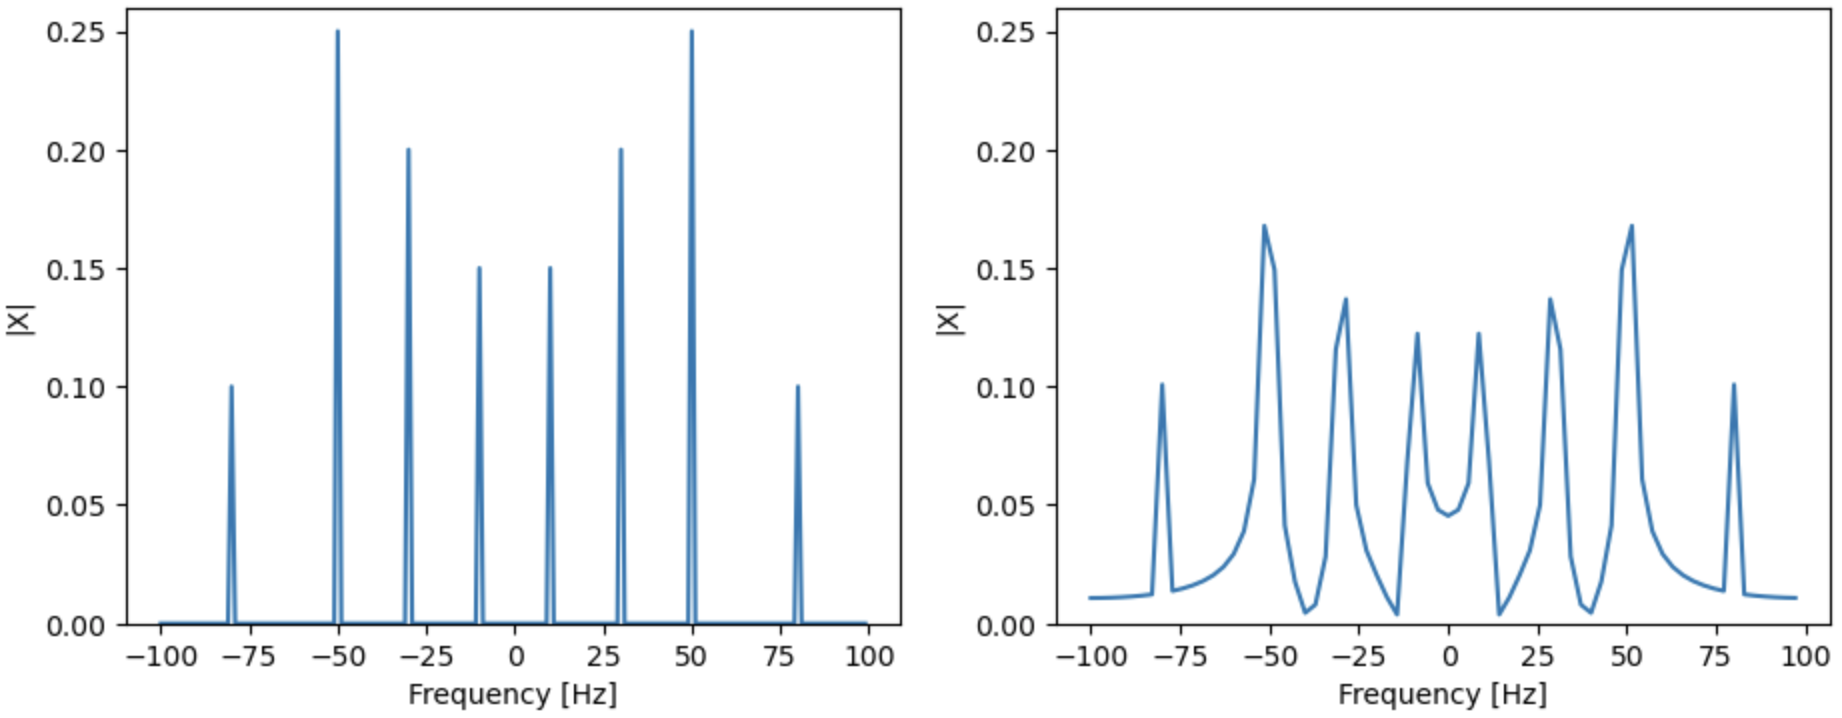
</div>

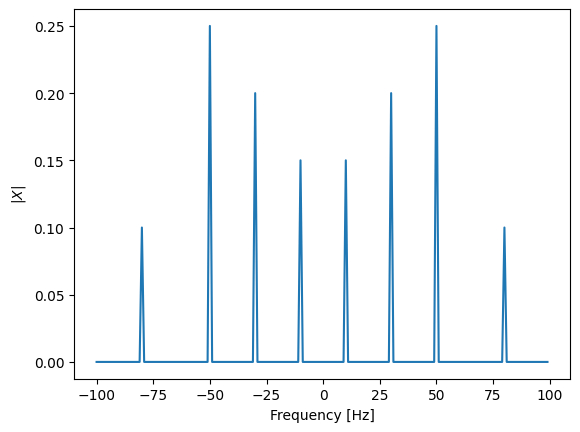

In [11]:
Fs = 200
n = np.arange(0, 1, 1/Fs)
signal = 0.3*np.sin(2*np.pi*n*10) + 0.4*np.sin(2*np.pi*n*30) + 0.5*np.sin(2*np.pi*n*50) + 0.2*np.sin(2*np.pi*n*80)

DFT = fft.fft(signal)
mag = fft.fftshift(np.abs(DFT)/n.size)
a = mag.size
freq = fft.fftshift(fft.fftfreq(a, d=1/Fs))

plt.plot(freq,mag)
plt.ylabel('$|X|$')
plt.xlabel('Frequency [Hz]')

plt.show()

Text(0.5, 0, 'Frequency [Hz]')

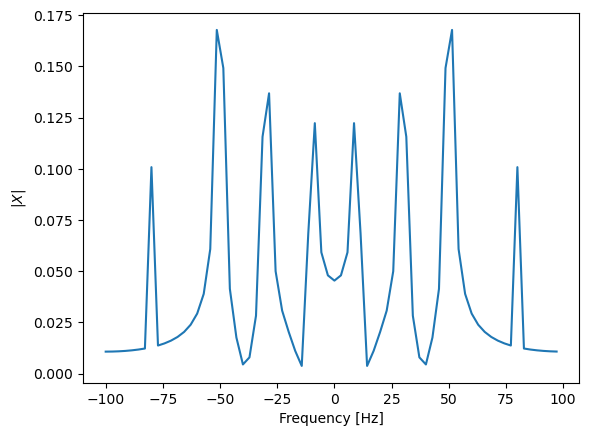

In [13]:
Fs = 200
n = np.arange(0, 0.35, 1/Fs)
signal = 0.3*np.sin(2*np.pi*n*10) + 0.4*np.sin(2*np.pi*n*30) + 0.5*np.sin(2*np.pi*n*50) + 0.2*np.sin(2*np.pi*n*80)

DFT = fft.fft(signal)
mag = fft.fftshift(np.abs(DFT)/n.size)
a = mag.size
freq = fft.fftshift(fft.fftfreq(a, d=1/Fs))

plt.plot(freq,mag)
plt.ylabel('$|X|$')
plt.xlabel('Frequency [Hz]')

<div class="alert alert-success">
<span style="color:black">
    
The shorter the signal, the less datapoints are taken in. This causes a lower resolution.
In these two cases all the peaks are still resolvable but in the case with the lower resolution the result is more smeared out.

Next, we shall artificially increase the signal length of the shorter signal by appending zeros to the end of the sequence. This is termed as _zero-padding_. 

This can be easily done by adding the `n` argument in the `fft` function. Alternatively, in the time-domain you can use the `np.zeros` function to create a vector of zeros which you can append to the signal vector to get a zero-padded sequence of the desired length. We shall now investigate the influence of zero-padding on the spectral representation/decomposition of the signal.

<div class="alert alert-info">
    
**Task** 

- Zero-pad the shorter signal so that the zero-padded sequence has lenghts of $0.5\unit{s}$, $0.75\unit{s}$ and $1\unit{s}$.
- Compute and plot the amplitude spectra of these zero-padded signals using the DFT
</div>

What your answer should look like:
<div>
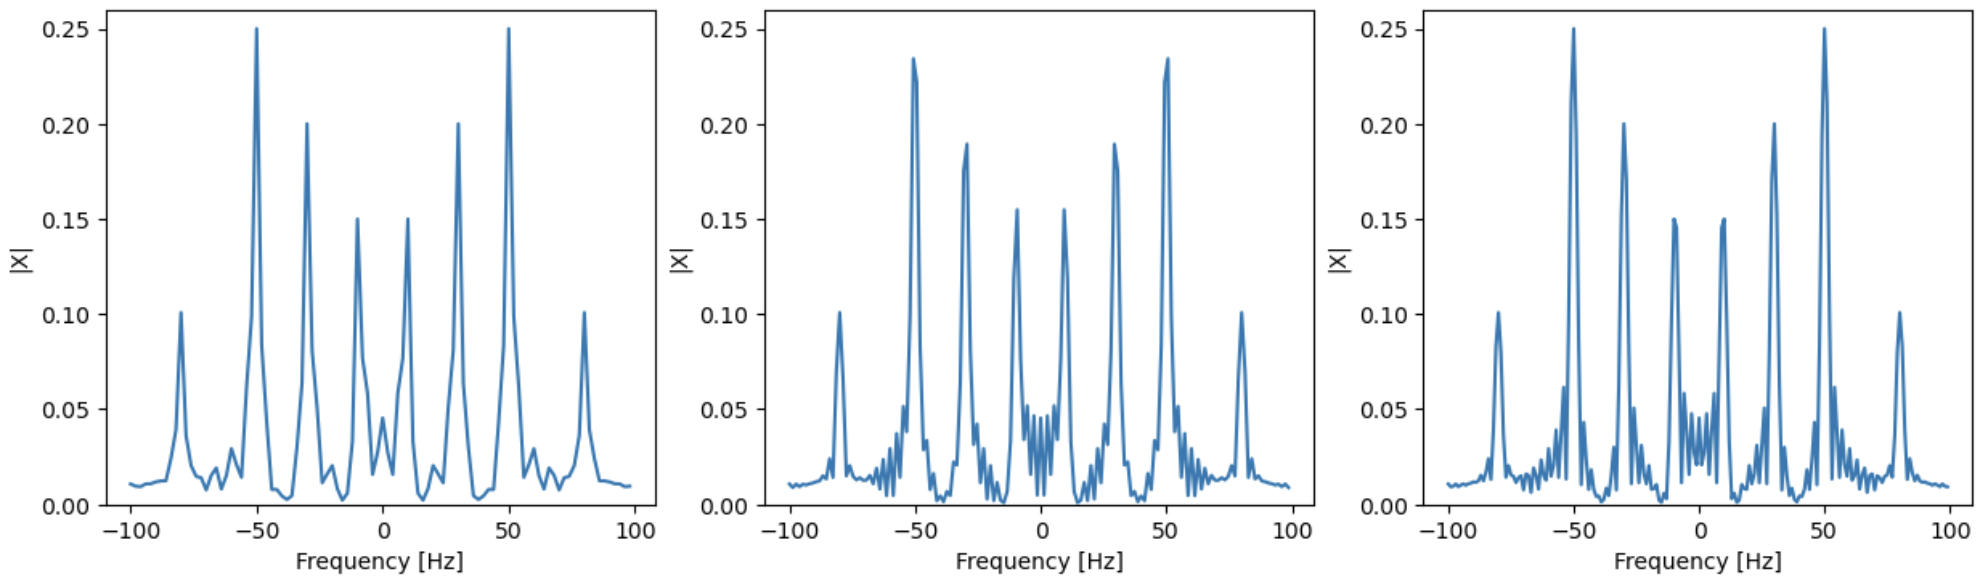
</div>

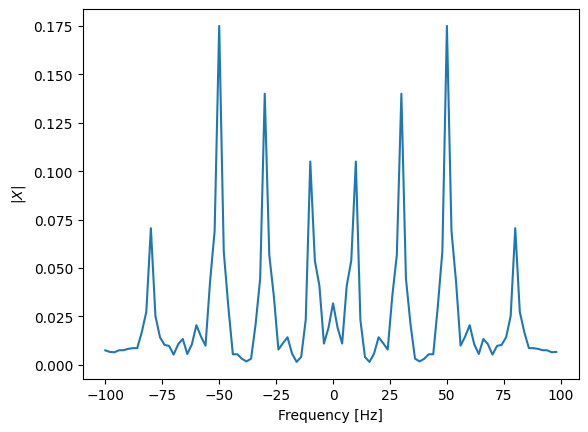

In [12]:
Fs = 200
n = np.concatenate((np.arange(0, 0.35, 1/Fs),np.zeros(int(0.15*Fs))))

signal = 0.3*np.sin(2*np.pi*n*10) + 0.4*np.sin(2*np.pi*n*30) + 0.5*np.sin(2*np.pi*n*50) + 0.2*np.sin(2*np.pi*n*80)

DFT = fft.fft(signal)
mag = fft.fftshift(np.abs(DFT)/n.size)
a = mag.size
freq = fft.fftshift(fft.fftfreq(a, d=1/Fs))

plt.plot(freq,mag)
plt.ylabel('$|X|$')
plt.xlabel('Frequency [Hz]')

plt.show()

Text(0.5, 0, 'Frequency [Hz]')

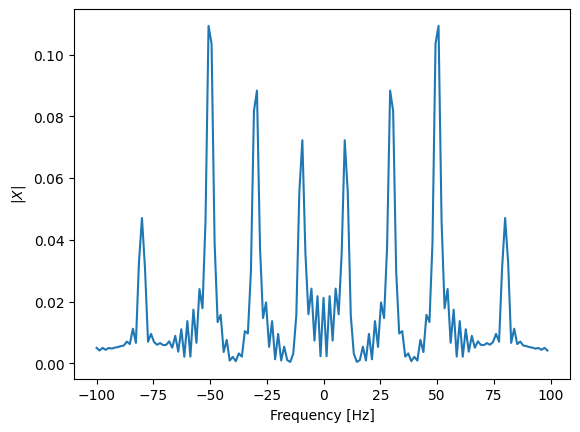

In [13]:
Fs = 200
n = np.concatenate((np.arange(0, 0.35, 1/Fs),np.zeros(int(0.4*Fs))))

signal = 0.3*np.sin(2*np.pi*n*10) + 0.4*np.sin(2*np.pi*n*30) + 0.5*np.sin(2*np.pi*n*50) + 0.2*np.sin(2*np.pi*n*80)

DFT = fft.fft(signal)
mag = fft.fftshift(np.abs(DFT)/n.size)
a = mag.size
freq = fft.fftshift(fft.fftfreq(a, d=1/Fs))

plt.plot(freq,mag)
plt.ylabel('$|X|$')
plt.xlabel('Frequency [Hz]')

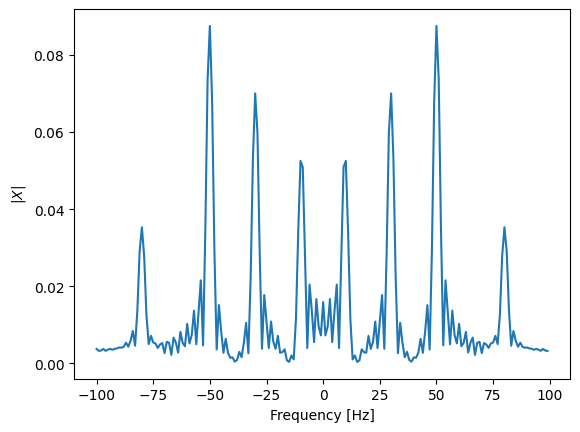

In [14]:
Fs = 200
n = np.concatenate((np.arange(0, 0.35, 1/Fs),np.zeros(int(0.65*Fs))))

signal = 0.3*np.sin(2*np.pi*n*10) + 0.4*np.sin(2*np.pi*n*30) + 0.5*np.sin(2*np.pi*n*50) + 0.2*np.sin(2*np.pi*n*80)

DFT = fft.fft(signal)
mag = fft.fftshift(np.abs(DFT)/n.size)
a = mag.size
freq = fft.fftshift(fft.fftfreq(a, d=1/Fs))

plt.plot(freq,mag)
plt.ylabel('$|X|$')
plt.xlabel('Frequency [Hz]')

plt.show()

<div class="alert alert-info">
    
**Task** 

Based on these plots, answer the following questions:

- Compare the spectrum obtained after zero-padding to the amplitude spectrum of the longer sequence (`Xlong`) and the amplitude spectrum of the non-zero-padded short sequence. What do you observe?
- What can be a benefit of using zero-padding? 
- If you are recording a biomedical, cortical EEG signal and you require a resolution of 1 Hz to identify the energy in the alpha band of 5 Hz, what should the minimum duration of your EEG recording window be?
</div>


<div class="alert alert-success">
<span style="color:black">
    
When comparing the spectrum after zero-padding and the spectrum of the longer secuence, one could see that the same peaks are visualized but there is a lot more noise in the case of zero-padding.<br>
When comparing the spectrum after zero-padding and the spectrum of the non-zero-padded short sequence, one could observe that zero-padded case visualizes more the underlying spectrum of the signal but the resolution stays the same.<br><br>
A benefit of zero-padding can be that it visualizes the underlying spectrum of the signal.<br><br>
A resolution of 1 Hz means that the frequency range needs to be divided in bins of 1 Hz. So we need 5 bins to identify the energy in the alpha band of 5 Hz.<br>
Resolution = $\frac{Fs}{N}$, $1 \ \text{Hz} = \frac{Fs}{N} = \frac{5 \ \text{Hz}}{5 \ \text{Hz}\cdot T}\Rightarrow  T = 1 \ \text{s}$<br>
The minimum duration of the EEG recording window should be 1 second.

## Exercise: Windowing and spectrogram

Thus far we should have had no issues with plotting the spectra and observing the frequency components at the expected locations. This was because the signal durations were usually chosen to be a complete number of periods of the underlying sinusoids. Now we shall examine what happens when this is not the case and what to do in such situations.

<div class="alert alert-info">
    
**Task** 

- Make a signal $x_1$ which is the sum of two sine function of frequencies $F_1 = 10\unit{Hz}$ and $F_2 = 20\unit{Hz}$. The duration of the signal is $0.5\unit{s}$ and $\fsamp=1000\unit{Hz}$. 
- Calculate the DFT and plot the amplitude spectrum of this signal.
- Now generate another signal (call it $x_2$), which has the same frequencies as above, but with a length of $0.511\unit{s}$. 
- Compute and plot the magnitude spectrum of this signal and compare it to spectrum of the previous case.
- What do you observe? What could give rise to this effect? **Tip:** Plot the time domain signal in each case. Does this give you any ideas? 

</div>

What your answer should look like:
<div>
<img src="attachment:37bdae71-6ad7-40c7-983e-98e116f8cde8.png" width="800"/>
</div>

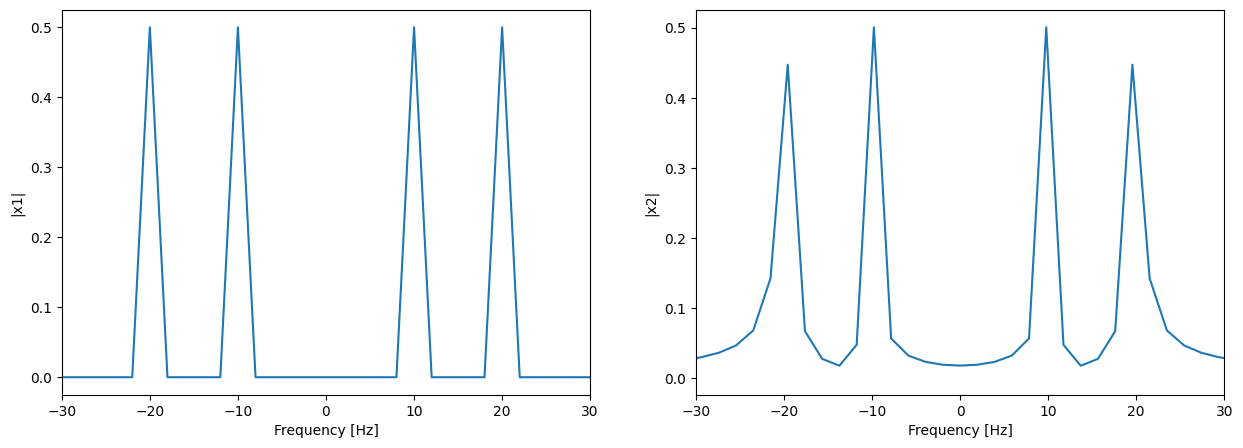

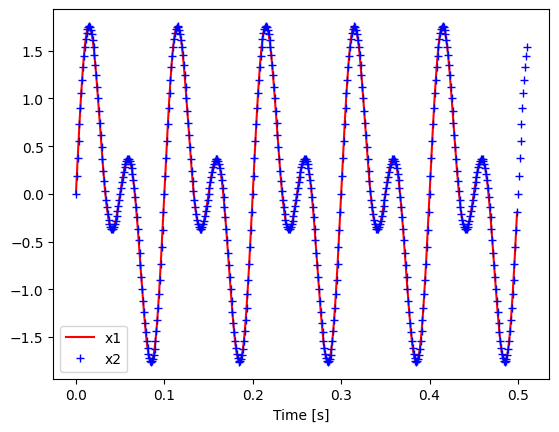

In [18]:
fs = 1000
n1 = np.arange(0,0.5,1/fs)
n2 = np.arange(0,0.511,1/fs)
x1 = np.sin(2*np.pi*10*n1) + np.sin(2*np.pi*20*n1)
x2 = np.sin(2*np.pi*10*n2) + np.sin(2*np.pi*20*n2)


DFT=np.fft.fft(x1)
mag1=np.fft.fftshift(np.abs(DFT)/n1.size)
a=mag1.size
freq1= np.fft.fftshift(np.fft.fftfreq(a, d=1/fs))

DFT=np.fft.fft(x2)
mag2=np.fft.fftshift(np.abs(DFT)/n2.size)
a=mag2.size
freq2= np.fft.fftshift(np.fft.fftfreq(a, d=1/fs))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.plot(freq1,mag1)
ax1.set_xlim([-30, 30])
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('|x1|')

ax2.plot(freq2,mag2)
ax2.set_xlim([-30, 30])
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('|x2|')

plt.figure(2)
plt.plot(n1,x1,'r', label='x1')
plt.plot(n2,x2,'b+', label='x2')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

<div class="alert alert-success">
<span style="color:black">
The frequency domain of the extended signal shows more 'garbage'. This is because in the time domain, the end of the signal doesn't correspond to the start of the signal when we would periodically extend the signal.

One way to mitigate this effect is by using _windowing_. Windowing generally means to multiply the time domain waveform with a (typically smooth) function which tapers to 0 at the boundaries (beginning and end of the segment) and has a maximum of 1 in the middle. Several windows exist, each with different trade-offs. We shall investigate 3 most commonly used ones:

- Rectangular window: This essentially is the same as not windowing your time-domain signal before calculating the DFT. you can use the [`np.ones`][ones] function to generate this window  
- [von Hann][hann] window: 
- Hybrid windows: Such windows combine the gentle onset and offset characteristics of tapering windows with the flat characteristics of the rectangular windows. We shall design such a window where the edges are taken from the characteristics of a von Hann window and the flat characteristic of the rectangular window is taken for the middle. You can experiment with this window by varying the "fade-in" and "fade-out" widths. These are generated by, respectively, the left and right half of a von Hann window of twice the size of the fade width. 

<div class="alert alert-info">
    
**Task** 

- Generate the three windowing functions above, with duration of $0.511 \unit{s}$ and $\fsamp=1000\unit{Hz}$. 
- For the hybrid window, play with two different values of the fade-in and fade-out width (e.g., $50\unit{ms}$ and one other value of your choice). Ensure that the resulting hybrid window shows no sudden "jumps"    
- Plot and examine the properties of these windows in the time _and_ frequency domain. **Important:** When plotting the frequency spectrum, zero-pad the signal to **four times** the window length to better see the underlying spectrum of the windows.
- Describe the time- and frequency-domain properties of these windows in the answer box, along with what you expect their effect on the signal to be.

Some handy functions are: `int`, [`np.ones`][ones] and [`np.concatenate`][concatenate]
</div>

[ones]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
[concatenate]: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy-concatenate
[hann]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.hanning.html


What your answer should look like (for the time-domain version of the windows):

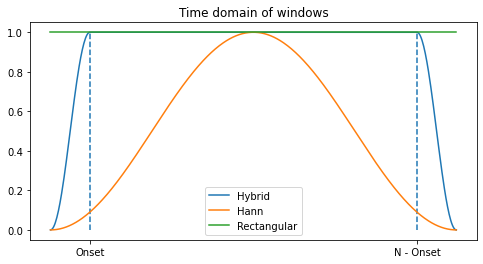

And for the frequency domain:
<div>
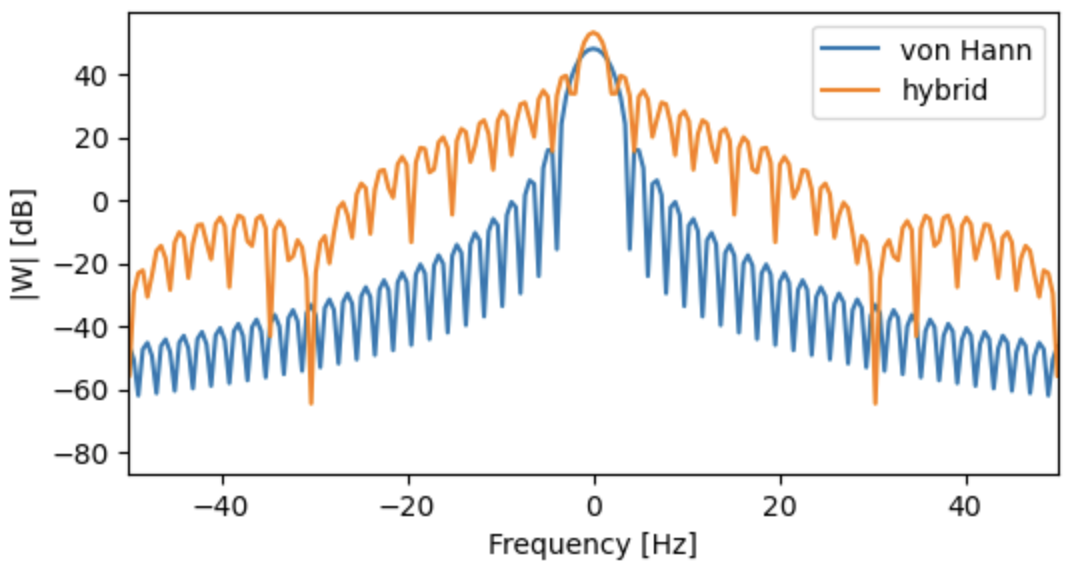
</div>

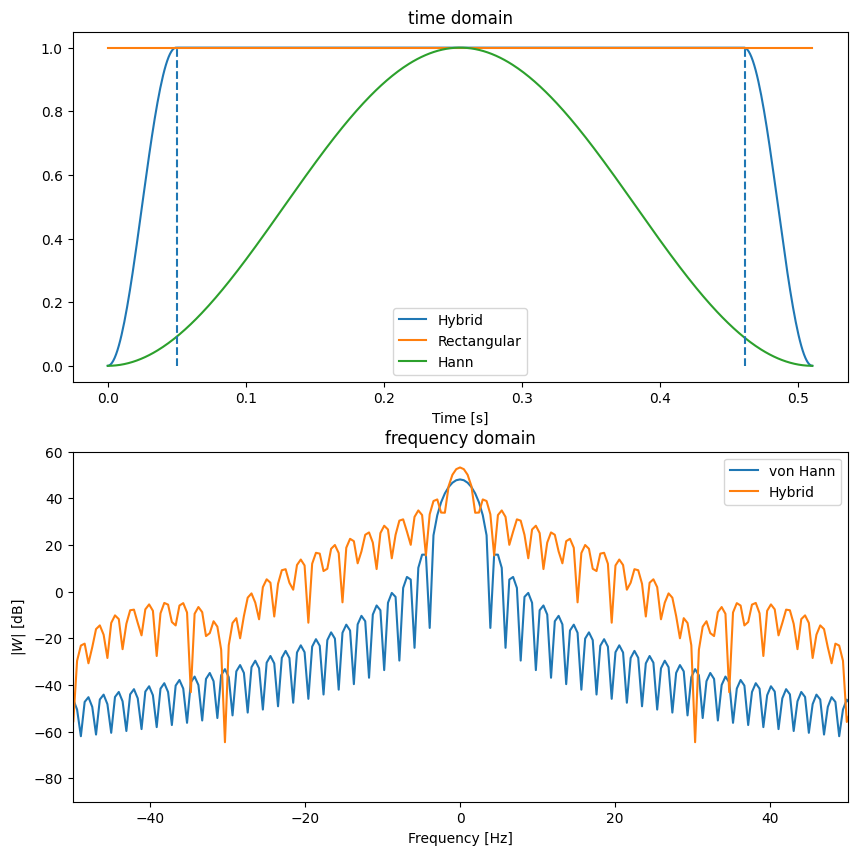

In [20]:
#time domain:
fs=1000
n2 = np.arange(0,0.511,1/fs)
fadein = 50
fadeout = 50

hfadein= np.hanning(fadein *2)
array_in= np.array_split(hfadein,2)

hfadeout=np.hanning(fadeout *2)
array_out = np.array_split(hfadeout,2)

h_rest= np.ones(511-fadein-fadeout)

h_ones= np.ones(511)
h_hann= np.hanning(511)

con= np.concatenate((array_in[0], h_rest, array_out[1]))

#frequency domain:
DFT=np.fft.fft(con, con.size*4)
mag=np.fft.fftshift(np.abs(DFT))
a=mag.size
freq= np.fft.fftshift(np.fft.fftfreq(a, d=1/fs))

DFT2=np.fft.fft(h_hann, h_hann.size*4)
mag2=np.fft.fftshift(np.abs(DFT2))
a2=mag2.size
freq2= np.fft.fftshift(np.fft.fftfreq(a2, d=1/fs))

#plot
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.plot(n2,con, label='Hybrid')
ax1.plot(n2, h_ones, label = 'Rectangular')
ax1.plot(n2,h_hann, label='Hann')
ax1.vlines((fadein/fs, (511-fadeout)/fs ), 0,1, linestyles='dashed')
ax1.legend()
ax1.set_xlabel('Time [s]')
ax1.set_title('time domain')

ax2.plot(freq2, 20*np.log10(mag2),label='von Hann')
ax2.plot(freq,20*np.log10(mag),label='Hybrid')
ax2.set_xlim(-50,50)
ax2.set_ylim(-90,60)
ax2.legend()
ax2.set_title('frequency domain')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('$|W|$ [dB]')

plt.show()

The rectangular window is just a straight line at the value of 1, when we multiplicate this window to the signal, no changes in both time and frequency domain are seen. The von Hann window is a bell shaped curve, when we multiplicate this window with the original signal, the signal starts and ends at 0 and peaks at the middle of the curve. this ensures a smooth transition when we periodically expand the signal. The hybrid window is a combination of the previous two, at the sides, the signal fades to 0, while the rest of the signal is multiplied by the rectangular window and is thus equal to the original signal. 

We shall now verify our expectations regarding the effect of the windows by applying them to the previously generated signal of length $0.511\unit{s}$.

<div class="alert alert-info">
    
**Task** 

* Apply the generated windows to the signal $x_2$ you generated previously. Note: applying a window means multiplying the signal with the generated window.
* Plot the windowed time-domain signal and the corresponding frequency (amplitude) spectrum. In the spectrum plots, limit the x-axis of your figures to show content between -50 and 50 Hz. 
* Based on the plots, answer the following:
    * What is the benefit of applying a window to your signal before computing the DFT?
    * List one trade-off to consider when applying windowing to recorded signals
</div>

What your answer should look like:
<div>
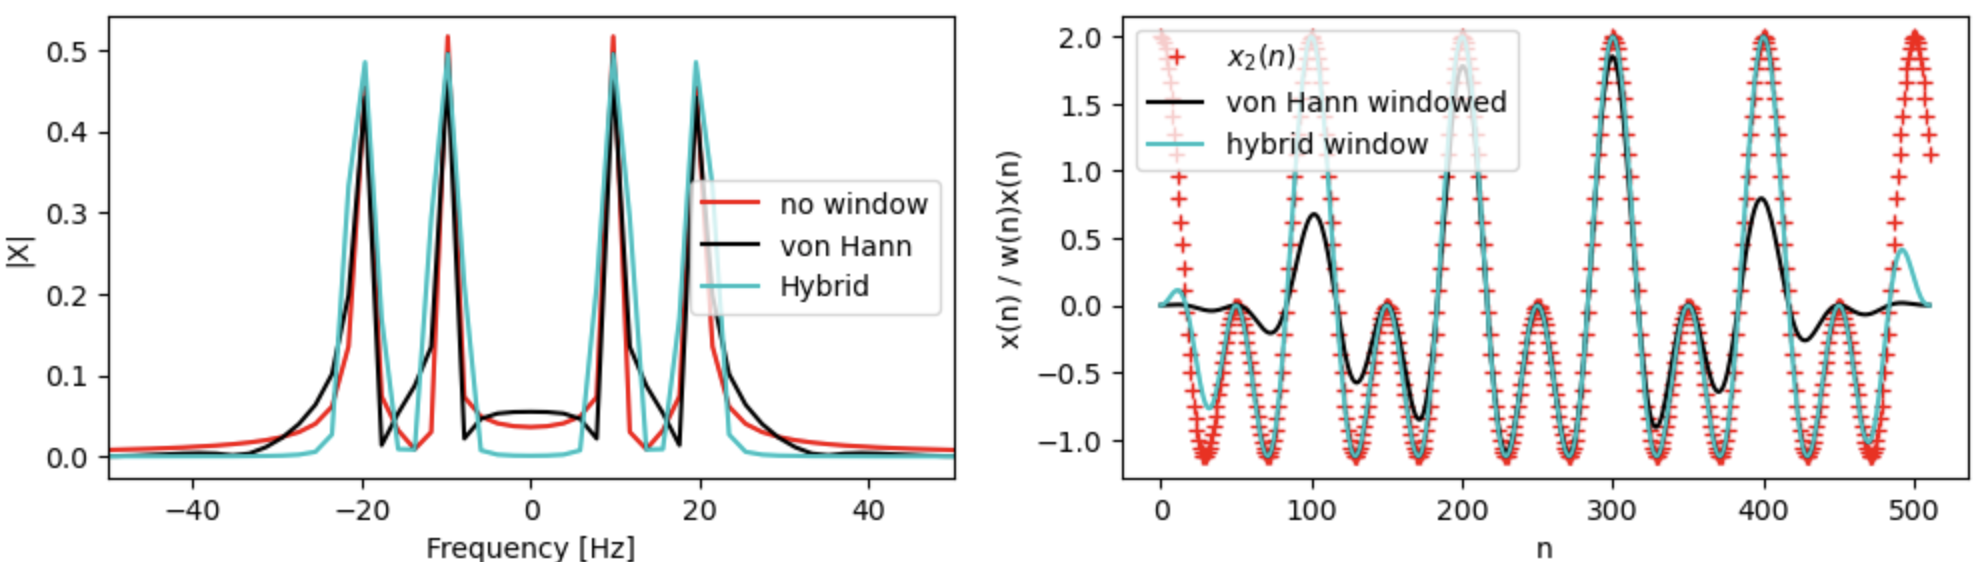
</div>

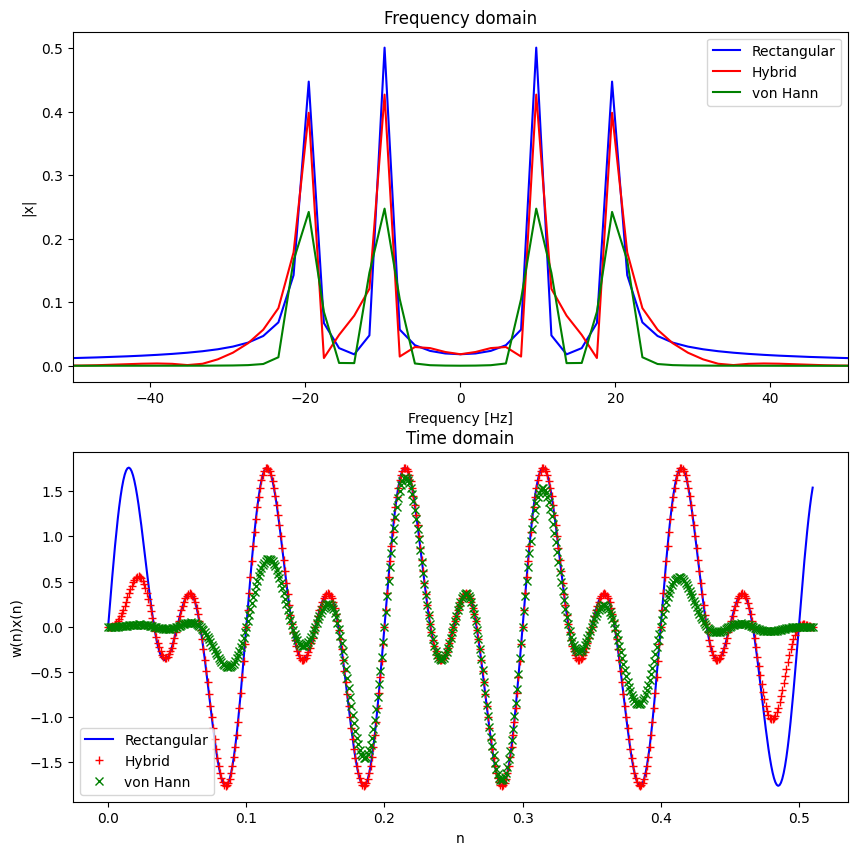

In [23]:
fs = 1000
con= np.concatenate((array_in[0], h_rest, array_out[1]))
h_hann= np.hanning(511)

n21 = np.arange(0,0.511,1/fs)
x21 = (np.sin(2*np.pi*10*n21) + np.sin(2*np.pi*20*n21))
DFT21=np.fft.fft(x21)
mag21=np.fft.fftshift(np.abs(DFT21)/n21.size)
a21=mag21.size
freq21= np.fft.fftshift(np.fft.fftfreq(a21, d=1/fs))

n22 = np.arange(0,0.511,1/fs)
x22 = con*(np.sin(2*np.pi*10*n22) + np.sin(2*np.pi*20*n22))
DFT22=np.fft.fft(x22)
mag22=np.fft.fftshift(np.abs(DFT22)/n22.size)
a22=mag22.size
freq22= np.fft.fftshift(np.fft.fftfreq(a22, d=1/fs))

n23 = np.arange(0,0.511,1/fs)
x23 = h_hann*(np.sin(2*np.pi*10*n23) + np.sin(2*np.pi*20*n23))
DFT23=np.fft.fft(x23)
mag23=np.fft.fftshift(np.abs(DFT23)/n23.size)
a23=mag23.size
freq23= np.fft.fftshift(np.fft.fftfreq(a23, d=1/fs))

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
ax1.plot(freq21,mag21,'b',label='Rectangular')
ax1.plot(freq22,mag22,'r', label='Hybrid')
ax1.plot(freq23,mag23,'g', label='von Hann')
ax1.set_xlim([-50,50])
ax1.legend()
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('|x|')
ax1.set_title('Frequency domain')

ax2.plot(n21, x21, 'b',label='Rectangular')
ax2.plot(n22,x22,'r+', label='Hybrid')
ax2.plot(n23,x23,'gx', label='von Hann')
ax2.legend()
ax2.set_xlabel('n')
ax2.set_ylabel('w(n)x(n)')
ax2.set_title('Time domain')
plt.show()

<div class="alert alert-success">
<span style="color:black">
The benefit of applying a window to your signal before computing the DFT is that it reduces the amount of noise/garbage in the DFT signal.This noise is due to discontinuities in the periodically extended signal. By applying a window the signal is forced to go to zero at the end and beginning of the segment (that is periodically extended), as a result there are less discontinuities.<br>

One trade-off to consider when applying windowing to recorded signals is that the frequency spectrum of the signal is smeared out. This causes loss of clear peaks in the spectrum.